K Means Clustering 

In [2]:
# Import required Python packages
from sklearn.cluster import KMeans 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import sample data
data_path = "C:/Users/eacalder/Documents/Education/DataScienceInfinity/Leasson_Downloads/T_Clustering/sample_data_clustering.csv"
sample_data = pd.read_csv(data_path)
print(sample_data.shape)
sample_data.head()

(300, 2)


,var1,var2
0,0.528827,0.919833
1,0.715373,0.133577
2,0.686088,0.824129
3,0.214553,0.609016
4,0.202000,0.486103


C:\Users\eacalder\AppData\Local\Temp\1/ipykernel_9068/2505151137.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


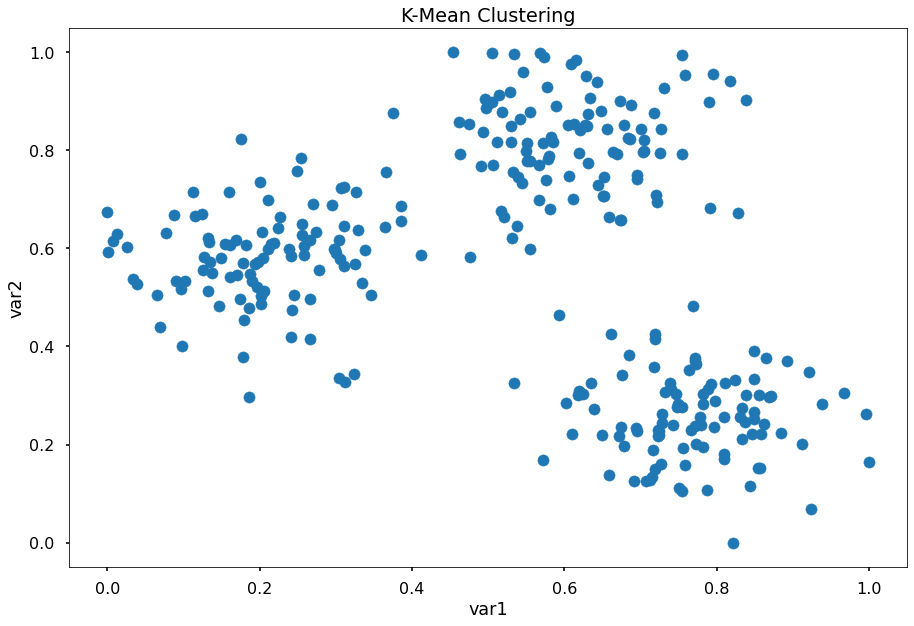

In [9]:
# Plot the data
# we plot first to see if we find clusters 
# investigating the data
plt.style.use("seaborn-poster")
plt.scatter(sample_data["var1"], sample_data["var2"])
plt.title('K-Mean Clustering')
plt.xlabel('var1')
plt.ylabel('var2')
plt.tight_layout()

you wouldnt see data as clearly clustered as this and need to make best educated guess

In [10]:
#Instantiate & fit the model
kmeans = KMeans(n_clusters=3, random_state=42) # 3 cause we see 3 clusters
kmeans.fit(sample_data)
# first iteration of the cluster performed and continues to run through

c:\Users\eacalder\.conda\envs\DSInfinity\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [11]:
# Add the cluster Labels to our df
sample_data['cluster'] = kmeans.labels_
sample_data.head()
# specifies the cluster that is belongs to

,var1,var2,cluster
0,0.528827,0.919833,0
1,0.715373,0.133577,1
2,0.686088,0.824129,0
3,0.214553,0.609016,2
4,0.202000,0.486103,2


In [13]:
sample_data['cluster'].value_counts()
# rarity for equal clusters, not always the case
# this analysis is interesting, a particular solution wont be the solution
# may need to split data, more clustering or other 

0    100
1    100
2    100
Name: cluster, dtype: int64

In [14]:
# Plot our clusters and centroids
centroids = kmeans.cluster_centers_
print(centroids)

[[0.61145409 0.82340359]
 [0.76730971 0.25649517]
 [0.20990899 0.58086933]]


In [15]:
clusters = sample_data.groupby('cluster')
print(clusters)

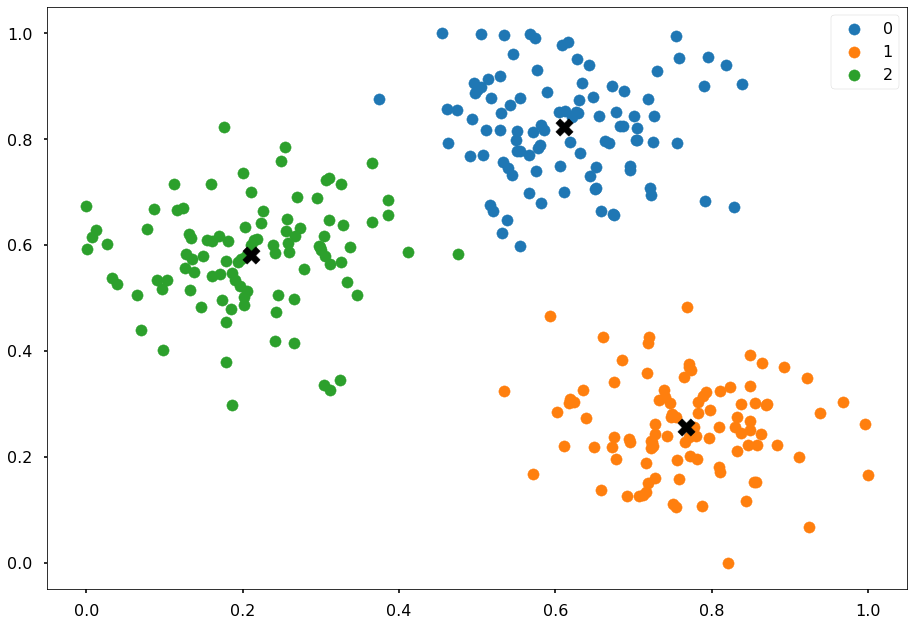

In [16]:
for cluster, data in clusters:
    plt.scatter(data["var1"], 
                data["var2"], 
                marker = "o", 
                label = cluster)
    plt.scatter (centroids [cluster,0], 
                 centroids [cluster, 1], 
                 marker = "X", 
                 color = "black",
                 s = 300 )#size
plt.legend()
plt.tight_layout()
plt.show()